# ShapeAnalyzer：形状分析与描述方法
在地理信息科学领域形状分析和描述对于分析面状目标的形状非常重要。介绍常用的矢量数据形状分析与描述方法。

In [1]:
from descriptors import Shape
from geom import Circle, Ellipse, Rectangle
from visualizer import annote_vertex, plot_shape
from shapely.geometry import *
import data
import numpy as np
import matplotlib.pyplot as plt

fig_size = [10,10]
plt.rcParams["figure.figsize"] = fig_size
shape = Shape(data.caseShp1)

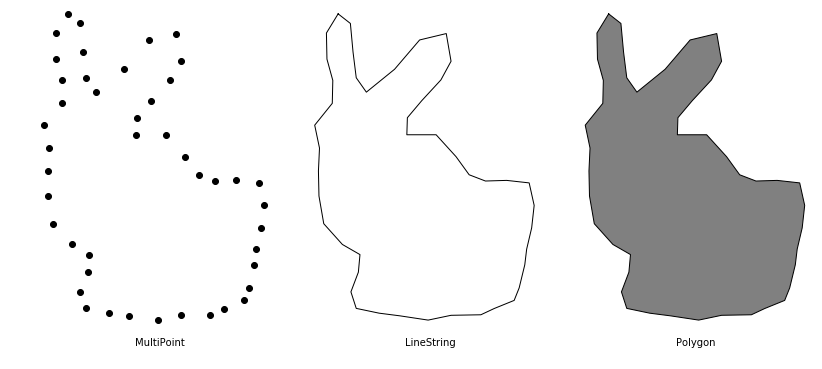

In [8]:
#形状的表达
fig_size = [12,5]
plt.rcParams["figure.figsize"] = fig_size
fig, axes = plt.subplots(1, 3, subplot_kw=dict(aspect="equal"),gridspec_kw = {'wspace':0, 'hspace':0})
plt.subplots_adjust(wspace=1, hspace=1)
plt.tight_layout()

size = fig.get_size_inches()*fig.dpi

mpt = MultiPoint(shape.to_points)

axes[0].set_axis_off()
plot_shape(mpt,axes[0])
#axes[0].set_title("MultiPoint")
axes[0].set_ylim(-10,320)
axes[0].annotate("MultiPoint", xy=[250,-10])

axes[1].set_axis_off()
plot_shape(shape,axes[1])
#axes[1].set_title("LineString")
axes[1].set_ylim(-10,320)
axes[1].annotate("LineString", xy=[250,-10])

axes[2].set_axis_off()
plot_shape(shape,axes[2], fill=True)
#axes[2].set_title("Polygon")
axes[2].set_ylim(-10,320)
axes[2].annotate("Polygon", xy=[250,-10])
plt.savefig("figures/shaperepr.png", dpi=300)
plt.show()

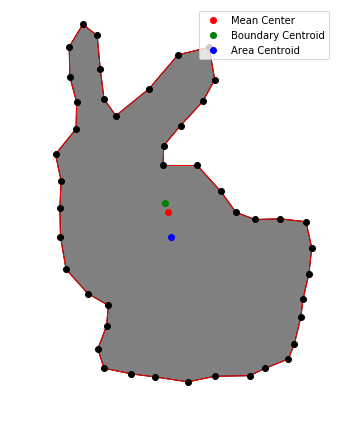

In [20]:
# 重心， Mean Center，Boundary Centroid，Area Centroid
plt.axis("off")
plt.axis("equal")
fig_size = [5,6]
plt.rcParams["figure.figsize"] = fig_size
plt.tight_layout()
mean_cent = shape.coords_mean
bcent = shape.boundary_centroid
acent = shape.area_centroid

plot_shape(shape, plt, fill=True)
plot_shape(shape, plt, c='r')
plot_shape(mpt, plt)

h1, = plt.plot(mean_cent.x, mean_cent.y, 'or')
h2, = plt.plot(bcent.x, bcent.y, 'og')
h3, = plt.plot(acent.x, acent.y, 'ob')
plt.legend([h1,h2,h3], ["Mean Center","Boundary Centroid","Area Centroid"])
plt.savefig("figures/centroids.png", dpi=300)
plt.show()

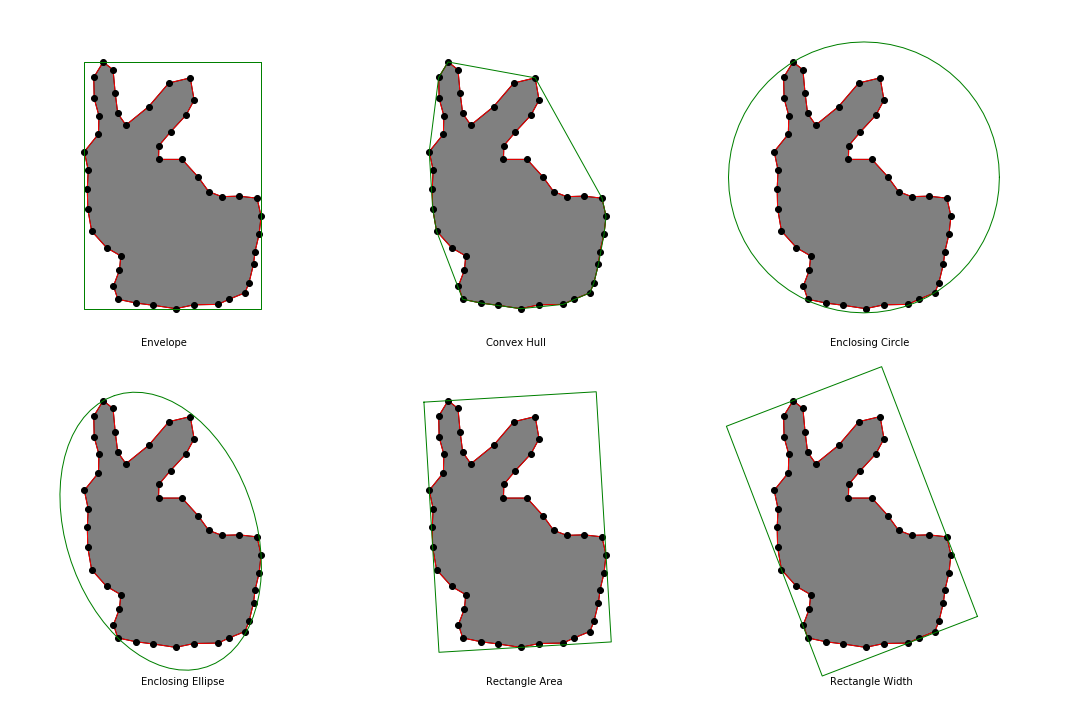

In [12]:
#最小边界几何（Minimum Bounding Geometry）

#plt.axis("off")
#plt.axis("equal")
fig_size = [15,10]
plt.rcParams["figure.figsize"] = fig_size

bbox = shape.bbox
chull = shape.chull
bcircle = shape.minimum_enclosing_circle
bellipse = shape.minimum_enclosing_ellipse
brect_area = shape.minimum_area_rect
brect_width = shape.minimum_width_rect
geoms = [[bbox.to_poly, chull, bcircle.to_poly], [bellipse.to_poly, brect_area.to_poly, brect_width.to_poly]]
labels = [["Envelope","Convex Hull", "Enclosing Circle"],["Enclosing Ellipse", "Rectangle Area", "Rectangle Width"]]
fig, axes = plt.subplots(2, 3, subplot_kw=dict(aspect="equal"),gridspec_kw = {'wspace':0, 'hspace':0})
plt.subplots_adjust(wspace=1, hspace=1)
plt.tight_layout()

for i in range(2):
    for j in range(3):
        axes[i,j].set_axis_off()
        axes[i,j].set_xlim(100,500)
        axes[i,j].set_ylim(-30,380)
        plot_shape(shape, axes[i,j], fill=True)
        plot_shape(shape, axes[i,j], c='r')
        plot_shape(mpt, axes[i,j])
        plot_shape(geoms[i][j], axes[i,j], c='g')
        axes[i,j].annotate(labels[i][j], xy=[230,-30])
        
plt.savefig("figures/bgeom.png", dpi=300)
plt.show()

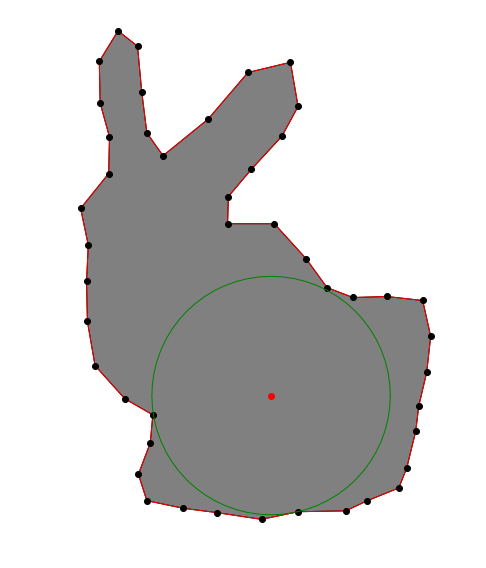

In [14]:
# 最大内接圆

plt.axis("off")
plt.axis("equal")
fig_size = [7,8]
plt.rcParams["figure.figsize"] = fig_size
plt.tight_layout()
circle = shape.maximum_inscribed_circle
plot_shape(shape, plt, fill=True)
plot_shape(shape, plt, c='r')
plot_shape(mpt, plt)
plot_shape(circle.to_poly, plt, c='g')
plt.plot(circle.center.x, circle.center.y, 'or')

plt.savefig("figures/incircle.png", dpi=300)
plt.show()

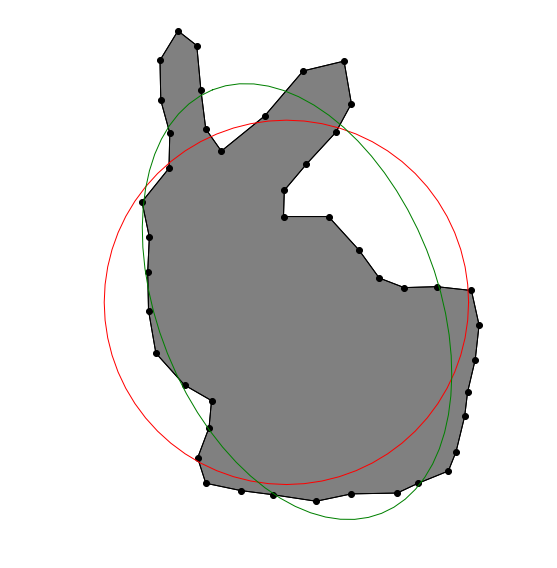

In [16]:
#拟合圆和拟合椭圆
fit_circle = shape.fitting_circle
fit_ellipse = shape.fitting_ellipse

plt.axis("off")
plt.axis("equal")
fig_size = [8,8]
plt.rcParams["figure.figsize"] = fig_size
plt.tight_layout()
plot_shape(shape, plt, fill=True)
plot_shape(shape, plt, c='k')
plot_shape(mpt, plt)
plot_shape(fit_circle.to_poly, plt, c='r')
plot_shape(fit_ellipse.to_poly, plt, c='g')

plt.savefig("figures/fittings.png", dpi=300)
plt.show()

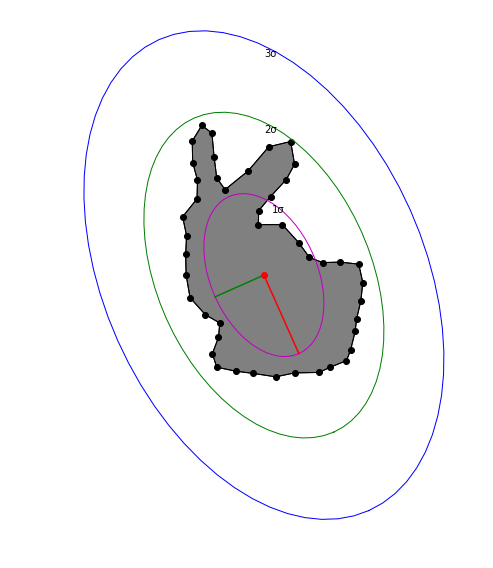

In [18]:
#形状特征值与误差椭圆
eign_val, eign_vector = shape.shape_eigen

cnt = shape.area_centroid

ell1 = shape.confidence_ellipse(1)
ell2 = shape.confidence_ellipse(2)
ell3 = shape.confidence_ellipse(3)
v1 = cnt +  eign_vector[0] * np.sqrt(eign_val[0])
v2 = cnt +  eign_vector[1] * np.sqrt(eign_val[1])
plt.axis("off")
plt.axis("equal")
fig_size = [7,8]
plt.rcParams["figure.figsize"] = fig_size
plt.tight_layout()
plot_shape(shape, plt, fill=True)
plot_shape(shape, plt, c='k')
plot_shape(mpt, plt)
plot_shape(ell1.to_poly, plt, c='m')
plot_shape(ell2.to_poly, plt, c='g')
plot_shape(ell3.to_poly, plt, c='b')

plt.plot([cnt.x, v1.x],[cnt.y, v1.y],'-r')
plt.plot([cnt.x, v2.x],[cnt.y, v2.y],'-g')

plt.plot(cnt.x, cnt.y, 'or')

plt.annotate("1σ",xy=[cnt.x+10, cnt.y+75])
plt.annotate("2σ",xy=[cnt.x, cnt.y+170])
plt.annotate("3σ",xy=[cnt.x, cnt.y+260])
plt.savefig("figures/confiell.png", dpi=300)
plt.show()